In [1]:
import numpy as np

In [2]:
from new_implementation.data_generator import DataGenerator
from new_implementation.mutation_filter import MutationFilter
#from new_implementation.cell_tree import CellTree
from new_implementation.mutation_tree import MutationTree
from new_implementation.swap_optimizer import SwapOptimizer

from new_implementation.tree_functions import path_len_dist

## Simulate a tree

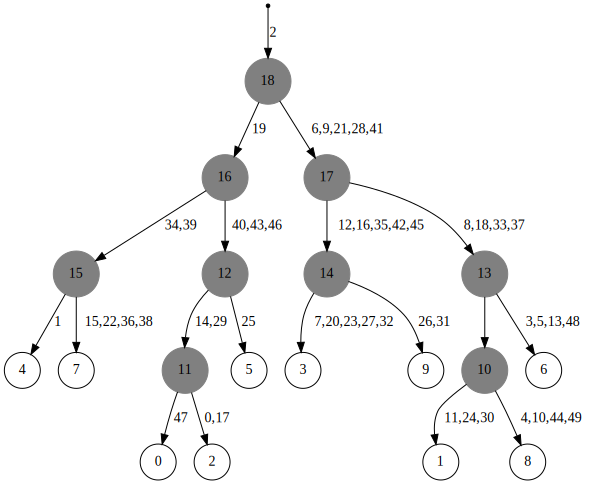

In [3]:
# Construct a generator object for 10 cells and 50 mutations
generator = DataGenerator(10, 50)
# Generate a random cell lineage tree with random mutations
np.random.seed(42)
generator.random_tree()
generator.random_mut_type()

# Visualize the generated tree
generator.ct.to_graphviz()

In [4]:
# generate random read counts
ref, alt = generator.generate_reads()
# Print the genotype transitions
for gt1, gt2 in zip(generator.gt1, generator.gt2):
    print('%s->%s' % (gt1, gt2))

A->H
R->H
R->H
A->H
A->H
A->H
A->H
R->H
H->A
R->H
A->H
H->A
R->H
R->H
R->H
R->H
A->H
H->A
A->H
H->R
R->H
A->H
A->H
H->R
A->H
H->A
H->R
H->R
R->H
R->H
R->H
H->R
R->H
H->A
A->H
R->H
H->A
A->H
R->H
R->H
R->H
R->H
A->H
A->H
H->R
A->H
A->H
R->H
A->H
H->A


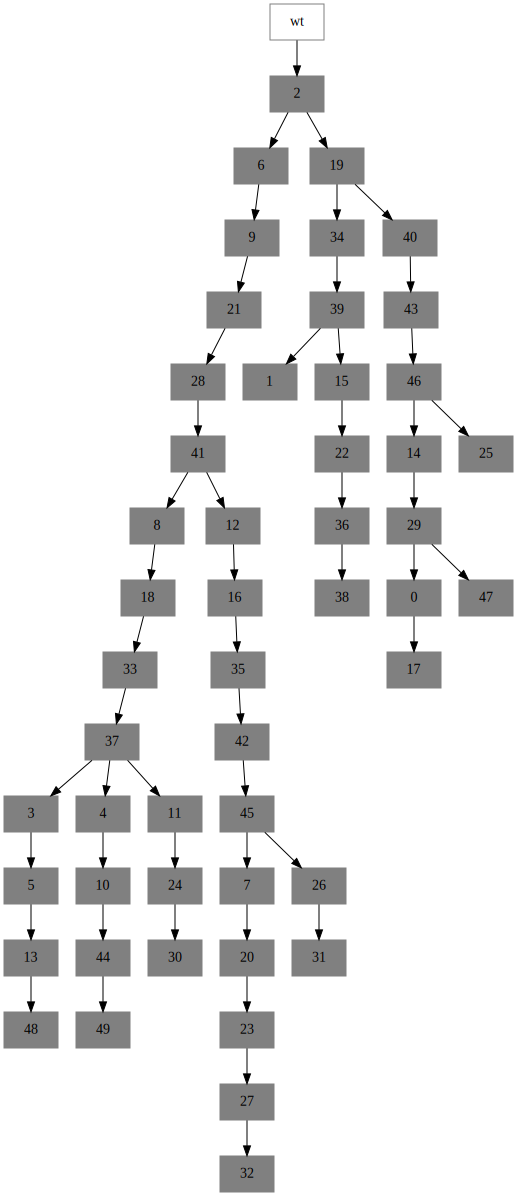

In [5]:
# Convert to mutation tree and visualize it
mut_tree = MutationTree(generator.n_mut)
mut_tree.fit_cell_tree(generator.ct)
mut_tree.to_graphviz()

In [6]:
# check individual reads
i_cell = 0 # cell index
i_mut = 0 # locus index
print('Cell %d has %d reference reads and %d alternative reads at locus %d' % (i_cell, ref[i_cell,i_mut], alt[i_cell,i_mut], i_mut))

Cell 0 has 0 reference reads and 13 alternative reads at locus 0


### Select mutations to be used for inference

In [7]:
mf = MutationFilter()
selected, gt1, gt2 = mf.filter_mutations(ref, alt, method = 'threshold', t = 0.5)

### In these sites, calculate likelihoods of each cell being mutated / not mutated

In [8]:
# log-likelihood matrices of each cell and locus having genotype 1 and 2, respectively
llh_mat_1, llh_mat_2 = mf.get_llh_mat(ref[:,selected], alt[:,selected], gt1, gt2)

In [9]:
i_cell = 0
i_mut = 0
print(f'Likelihood of cell {i_cell} being wildtype at locus {i_mut} is {np.exp(llh_mat_1[i_cell,i_mut])}')
print(f'Likelihood of cell {i_cell} being mutated at locus {i_mut} is {np.exp(llh_mat_2[i_cell,i_mut])}')

Likelihood of cell 0 being wildtype at locus 0 is 0.0004287851116096758
Likelihood of cell 0 being mutated at locus 0 is 0.533143234978098


## Tree inference

In [10]:
optimizer = SwapOptimizer()
optimizer.fit_llh(llh_mat_1, llh_mat_2)

In [11]:
optimizer.optimize()

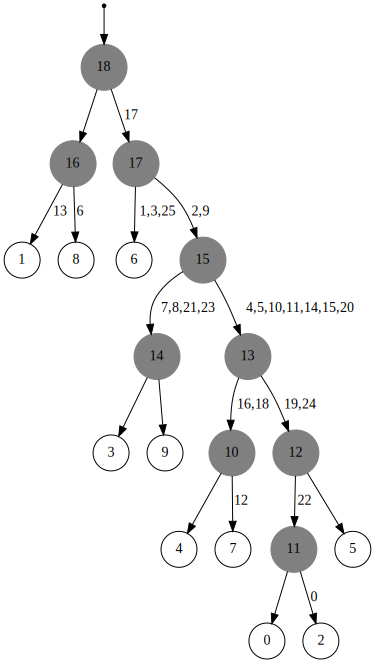

In [12]:
optimizer.ct.to_graphviz()

In [13]:
# calculate the path length distance between the real tree and the inferred tree
print(path_len_dist(optimizer.ct, generator.ct))

0.4666666666666667
